# Modelling Tracking Data for Albatross

In [31]:
import jax.numpy as jnp

import pandas as pd

import os

import matplotlib.pyplot as plt

In [32]:
figure_path = 'Figures/albatross'
file_path = '../../../../Data/albatross/tracking_data.xls'

## Loading Data 

In [33]:
albatross_data = pd.read_excel(file_path)

In [34]:
albatross_data

,ID,SPP_ID,SPP,DTYPE,SEX,RING,TRACKID,POINTID,STAGE,PRP_TRP,...,DIST_5_KM,STR_4,STR_5,FLT_DIR_2,FLT_DIR_5,RAW_SPD_2_MS,REL_FLT_DIR_2_HRS,REL_FLT_DIR_2_DAY,REL_FLT_DIR_2_WK,REL_FLT_DIR_2_MNTH
0,1,1,LMSA,PTT,U,2875660,1842-43,1,P,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,LMSA,PTT,U,2875660,1842-43,2,P,0.000180,...,NaN,NaN,NaN,250.015463,NaN,43.394440,144.015463,56.748982,148.326094,124.060130
2,3,3,LMSA,PTT,U,2875660,1842-43,3,P,0.000711,...,47.655794,0.553709,NaN,124.294351,216.042880,6.478954,14.394351,68.972130,22.604981,1.660983
3,4,4,LMSA,PTT,U,2875660,1842-43,4,P,0.003945,...,39.801064,0.633084,0.539971,227.794938,211.492234,9.910928,127.294938,31.621182,125.137970,109.162783
4,5,5,LMSA,PTT,U,2875660,1842-43,5,P,0.005027,...,38.431004,0.154711,0.596624,103.360732,217.727708,7.455013,7.139268,89.905749,1.671363,22.594601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49559,49560,642,WAN,PTT,F,5092135,9294-6,37,B,0.861469,...,142.485158,0.363267,0.608613,134.551469,120.187617,8.242840,75.651469,NaN,NaN,NaN
49560,49561,643,WAN,PTT,F,5092135,9294-6,38,B,0.902139,...,97.221054,0.596972,0.465129,47.553003,87.785329,2.278346,16.046997,NaN,NaN,NaN
49561,49562,644,WAN,PTT,F,5092135,9294-6,39,B,0.928798,...,80.776590,0.606222,0.616669,66.226985,61.298995,0.238079,2.726985,NaN,NaN,NaN
49562,49563,645,WAN,PTT,F,5092135,9294-6,40,B,0.963683,...,NaN,NaN,NaN,66.701806,NaN,3.285985,24.398194,NaN,NaN,NaN


In [35]:
albatross_data.columns

Index(['ID', 'SPP_ID', 'SPP', 'DTYPE', 'SEX', 'RING', 'TRACKID', 'POINTID',
       'STAGE', 'PRP_TRP', 'START_TIME', 'END_TIME', 'YMDHMS', 'WEEK',
       'LATITUDE', 'LONGITUDE', 'C', 'TRACKTIME', 'INT_S', 'DATEGMT',
       'TIMEGMT', 'SUNRISE', 'SUNSET', 'DAYNIGHT', 'TWILIGHT1', 'TWILIGHT2',
       'LIGHTDARK', 'WND_SPD_KMH', 'WND_SPD_MS_5', 'WND_DIR', 'ACT_1', 'ACT_2',
       'ACT_3', 'ACT_4', 'ACT_5', 'MEAN_ACT1', 'MEAN_ACT5', 'BioDist',
       'QSWndDayDir', 'QSWndDaySpd', 'QSWeekWndDir', 'QSnWeekWndSpd',
       'QSMnthWndDir', 'QSnMnthWndSpd', 'TOX_LUX', 'SUN_LUX', 'MOON_LUX',
       'COL_DIST', 'MAX_COL_DIST', 'PRP_MAX_DIST', 'TRP_STAGE', 'INCOMP',
       'VAR_TRP_STAGE', 'COL_WND_DIR', 'COL_WND_SPD', 'HOUR', 'DIST_2_KM',
       'DIST_4_KM', 'DIST_5_KM', 'STR_4', 'STR_5', 'FLT_DIR_2', 'FLT_DIR_5',
       'RAW_SPD_2_MS', 'REL_FLT_DIR_2_HRS', 'REL_FLT_DIR_2_DAY',
       'REL_FLT_DIR_2_WK', 'REL_FLT_DIR_2_MNTH'],
      dtype='object')

In [36]:
track_id = albatross_data["TRACKID"].unique()
time = []
w1 = []
w2 = []
x1 = []
x2 = []
for id_val in track_id:
    dummy_data = albatross_data[albatross_data['TRACKID']==id_val].reset_index()
    t = pd.to_datetime(dummy_data['YMDHMS'], format='%Y%m%d%H%M%S')
    t = t-t.loc[0]
    time.append(jnp.array(t.dt.total_seconds().to_numpy()).squeeze()/3600)
    w1.append(jnp.array([dummy_data['WND_SPD_MS_5'].to_numpy()]).squeeze()*jnp.cos(dummy_data['WND_DIR'].to_numpy()/(2*jnp.pi)))
    w2.append(jnp.array([dummy_data['WND_SPD_MS_5'].to_numpy()]).squeeze()*jnp.sin(dummy_data['WND_DIR'].to_numpy()/(2*jnp.pi)))
    x1.append(jnp.array([dummy_data['LATITUDE'].to_numpy()]).squeeze())
    x2.append(jnp.array([dummy_data['LONGITUDE'].to_numpy()]).squeeze())

## Plotting the Data

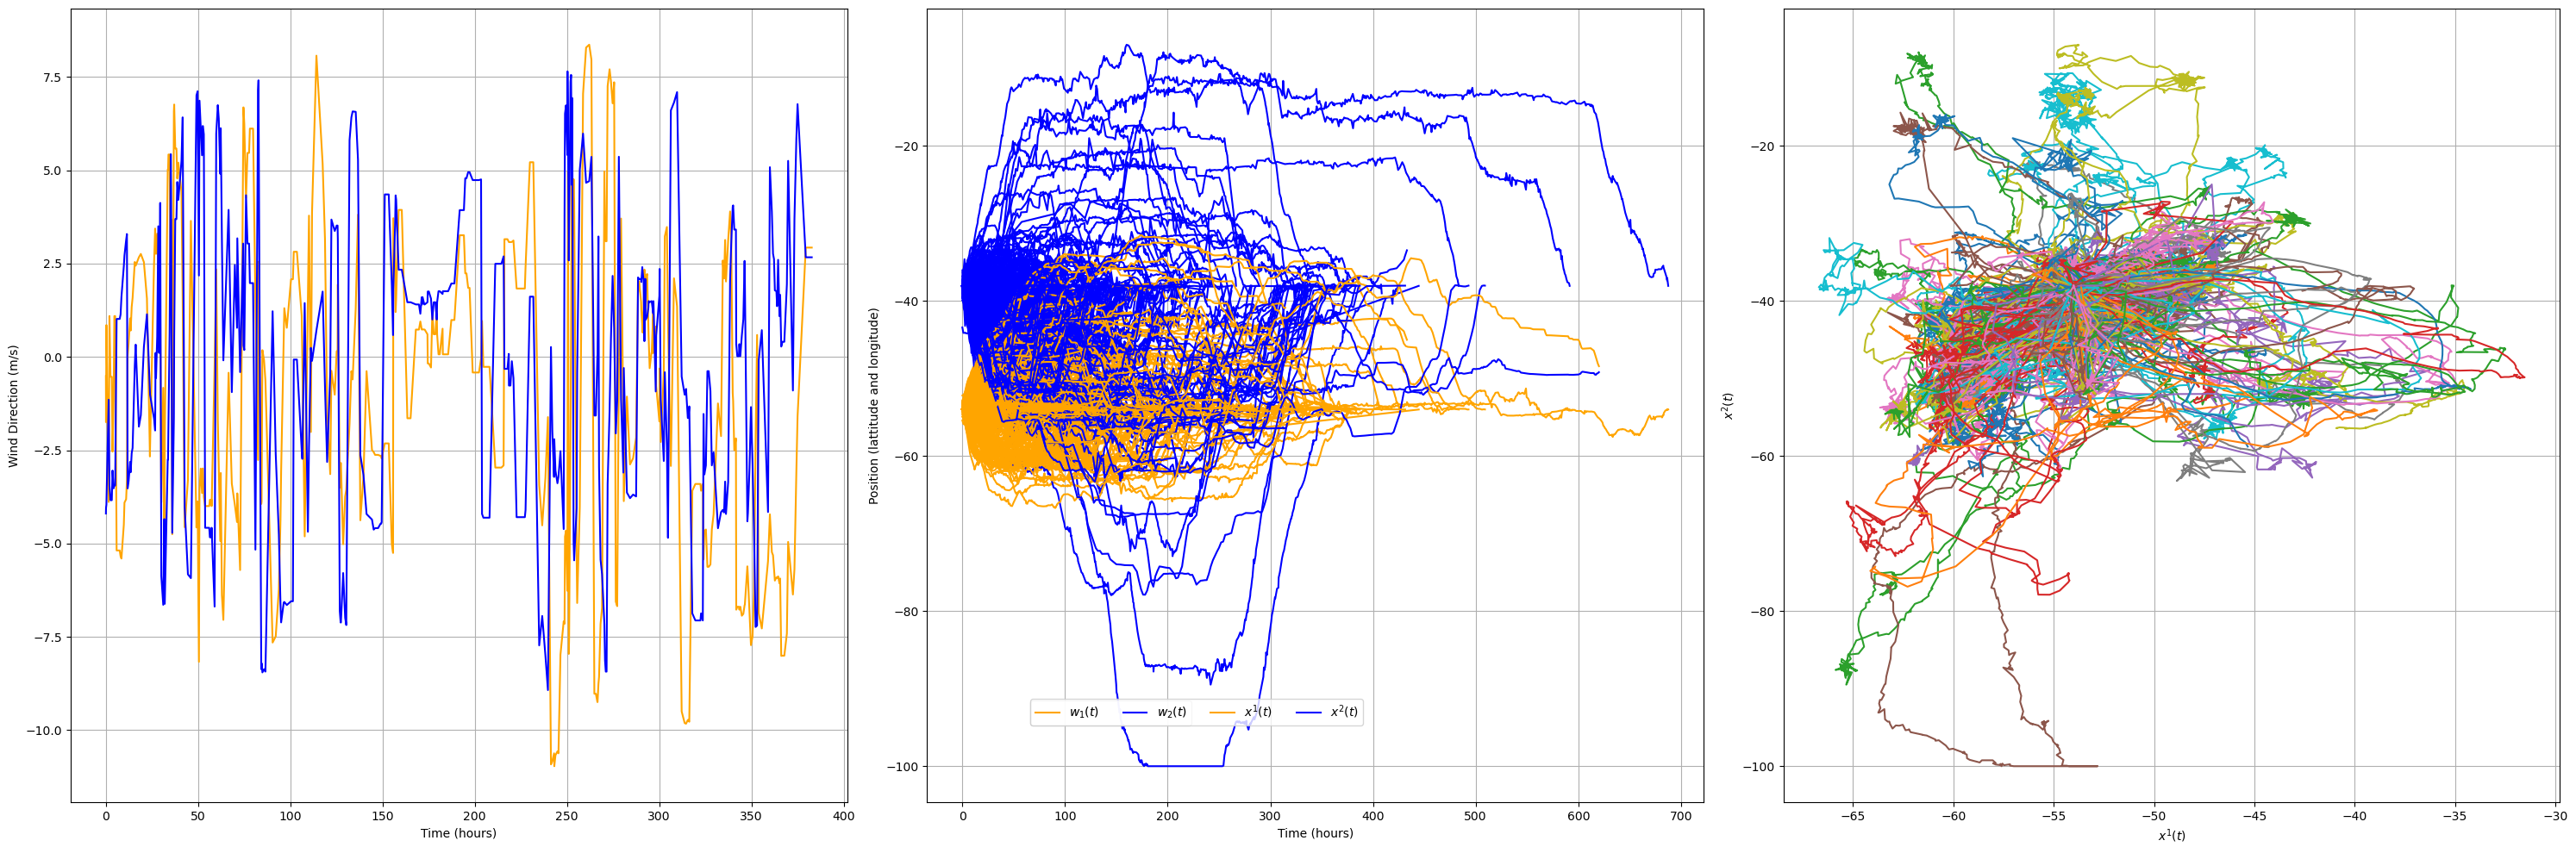

In [38]:
fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(131)
ax.plot(time[0], w1[0], color='orange', label=f'$w_{1}(t)$')
ax.plot(time[0], w2[0], color='blue', label=f'$w_{2}(t)$')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Wind Direction (m/s)')
ax.grid(True)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=(0.40,0.15), ncol=5)

ax = fig.add_subplot(132)
for i in range(len(time)):
    ax.plot(time[i], x1[i], color='orange')
    ax.plot(time[i], x2[i], color='blue')
ax.plot(time[i], x1[i], color='orange', label=f'$x^{1}(t)$')
ax.plot(time[i], x2[i], color='blue', label=f'$x^{2}(t)$')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Position (lattitude and longitude)')
ax.grid(True)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=(0.40,0.15), ncol=5)

ax = fig.add_subplot(133)
for i in range(len(x1)):
    ax.plot(x1[i], x2[i])
ax.set_xlabel(f'$x^{1}(t)$')
ax.set_ylabel(f'$x^{2}(t)$')
ax.grid(True)

fig.tight_layout()

fig.savefig(os.path.join(figure_path, 'wind_plot.pdf'), format='pdf', pad_inches=0.1, bbox_inches='tight')

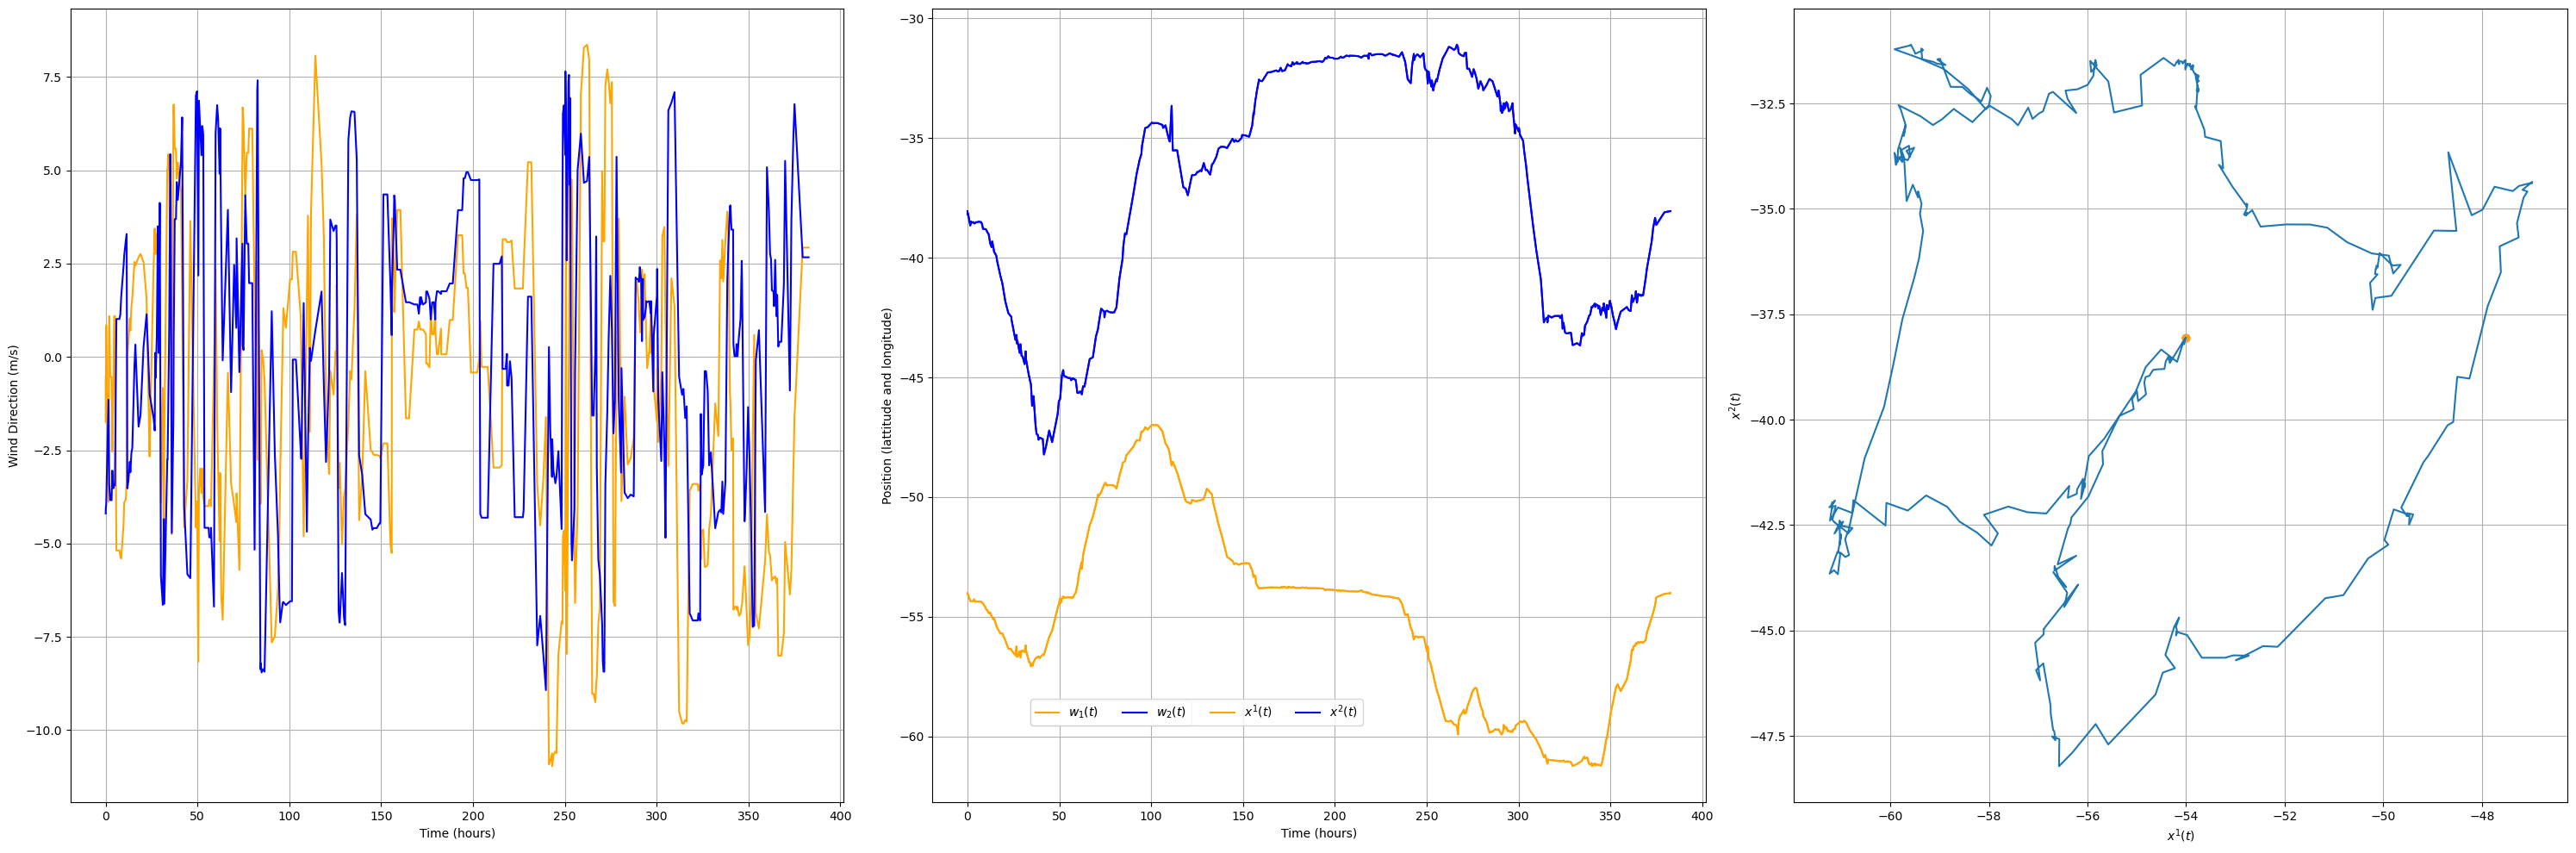

In [39]:
fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(131)
ax.plot(time[0], w1[0], color='orange', label=f'$w_{1}(t)$')
ax.plot(time[0], w2[0], color='blue', label=f'$w_{2}(t)$')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Wind Direction (m/s)')
ax.grid(True)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=(0.40,0.15), ncol=5)

ax = fig.add_subplot(132)
ax.plot(time[0], x1[0], color='orange')
ax.plot(time[0], x2[0], color='blue')
ax.plot(time[0], x1[0], color='orange', label=f'$x^{1}(t)$')
ax.plot(time[0], x2[0], color='blue', label=f'$x^{2}(t)$')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Position (lattitude and longitude)')
ax.grid(True)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=(0.40,0.15), ncol=5)

idx = 0
ax = fig.add_subplot(133)
ax.plot(x1[idx], x2[idx])
ax.scatter(x1[idx][0], x2[idx][0], color='red')
ax.scatter(x1[idx][-1], x2[idx][-1], color='orange')
ax.set_xlabel(f'$x^{1}(t)$')
ax.set_ylabel(f'$x^{2}(t)$')
ax.grid(True)

fig.tight_layout()

fig.savefig(os.path.join(figure_path, 'wind_plot.pdf'), format='pdf', pad_inches=0.1, bbox_inches='tight')

## Estimating the Geodesics as Ito processes